# 책따라 공부!

# 1 경사하강법


# 1-1 예측계산

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

sample_data1 = np.array([
    [166,58.7],
    [176.0,75.7],
    [171.0,62.1],
    [173.9,70.4],
    [169.0,60.1]

])

print(sample_data1)


[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.9  70.4]
 [169.   60.1]]


In [ ]:
x = sample_data1[:,0]

y = sample_data1[:,1]

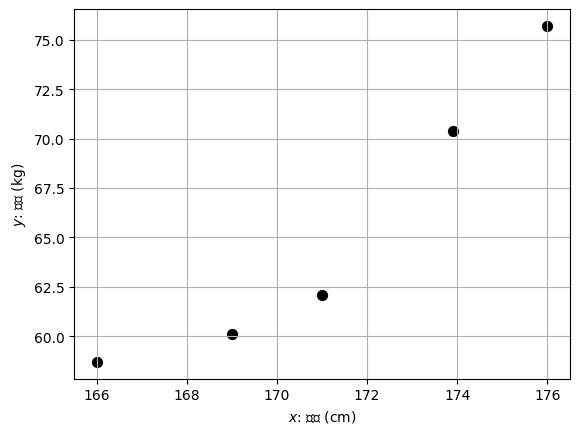

In [ ]:
plt.scatter(x,y,c='k',s=50)
plt.xlabel('$x$: 신장 (cm)')
plt.ylabel('$y$: 체중 (kg)')
plt.grid()
plt.show()

In [ ]:
X = x-x.mean()
Y = y-y.mean()

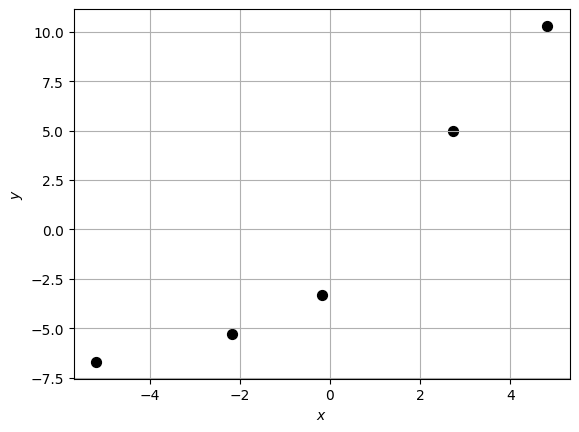

In [ ]:
plt.scatter(X,Y,c='k',s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.title("데이터 가공 후 신장과 체중의 관계 그래프")
plt.grid()
plt.show()

In [ ]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()


print(X)
print(Y)

tensor([-5.1800,  4.8200, -0.1800,  2.7200, -2.1800])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


/tmp/ipython-input-169600663.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).float()
/tmp/ipython-input-169600663.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y).float()


In [ ]:
W = torch.tensor(1.0,requires_grad=True).float()
b = torch.tensor(1.0,requires_grad=True).float()

In [ ]:
def pred(X):
    return W*X+b

In [ ]:
Yp = pred(X)
print(Yp)

tensor([-4.1800,  5.8200,  0.8200,  3.7200, -1.1800], grad_fn=<AddBackward0>)


In [ ]:
pip install torchviz

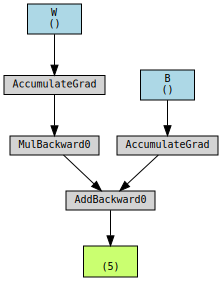

In [ ]:
from torchviz import make_dot


params = {'W':W ,'B':b}
g = make_dot(Yp,params=params)
display(g)

#1-2 손실 계산

In [ ]:
def mse(Yp,Y):
    loss = ((Yp-Y)**2).mean()

    return loss

In [ ]:
loss = mse(Yp,Y)
print(loss)

tensor(12.4016, grad_fn=<MeanBackward0>)


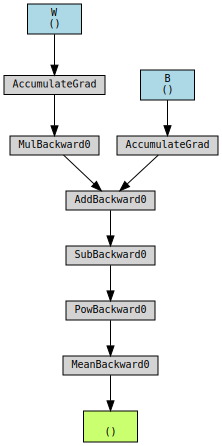

In [ ]:
from torchviz import make_dot


params = {'W':W ,'B':b}
g = make_dot(loss,params=params)
display(g)

#1-3 경사 계산


In [ ]:
loss.backward() # 경사게산

In [ ]:
print(W.grad)
print(b.grad)

tensor(-19.1408)
tensor(2.)


# 1-4 파라미터 수정

In [ ]:
#학습률 정의
lr = 0.001

#경사 기반 파라미터 수정

W -= lr*W.grad
b -= lr*b.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
#경사 기반 파라미터 수정
#with torch.no_grad() 작성필요

with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad

    #계산이 끝난 경사값을 초기화
    W.grad.zero_()
    b.grad.zero_()

In [ ]:
print(W)
print(b)
print(W.grad)
print(b.grad)

tensor(1.0574, requires_grad=True)
tensor(0.9940, requires_grad=True)
tensor(0.)
tensor(0.)


# 1-5 반복계산



In [ ]:
# 초기 변수 설정

W = torch.tensor(1.0,requires_grad=True).float()
b = torch.tensor(1.0,requires_grad=True).float()


# 반복 횟수
epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화

history = np.zeros((0,2))

# 루프 처리
for epoch in range(1,epochs+1):


    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp,Y)

    # 경사 계산
    loss.backward()

    with torch.no_grad():
        #파리미터 수정
        W -= lr*W.grad
        b -= lr*b.grad

        #경사값 초기화
        W.grad.zero_()
        b.grad.zero_()


    # 10번 반복마다 손실 기록
    if (epoch % 10 == 0):
        item = np.array([epoch,loss.item()])

        history = np.vstack((history, item))

        print(f'epoch =  {epoch} loss = {loss:.4f}')

epoch =  10 loss = 9.6821
epoch =  20 loss = 7.7935
epoch =  30 loss = 6.6393
epoch =  40 loss = 5.9293
epoch =  50 loss = 5.4880
epoch =  60 loss = 5.2096
epoch =  70 loss = 5.0299
epoch =  80 loss = 4.9103
epoch =  90 loss = 4.8275
epoch =  100 loss = 4.7672
epoch =  110 loss = 4.7210
epoch =  120 loss = 4.6837
epoch =  130 loss = 4.6521
epoch =  140 loss = 4.6244
epoch =  150 loss = 4.5992
epoch =  160 loss = 4.5760
epoch =  170 loss = 4.5543
epoch =  180 loss = 4.5338
epoch =  190 loss = 4.5143
epoch =  200 loss = 4.4956
epoch =  210 loss = 4.4778
epoch =  220 loss = 4.4607
epoch =  230 loss = 4.4444
epoch =  240 loss = 4.4286
epoch =  250 loss = 4.4135
epoch =  260 loss = 4.3991
epoch =  270 loss = 4.3851
epoch =  280 loss = 4.3718
epoch =  290 loss = 4.3589
epoch =  300 loss = 4.3466
epoch =  310 loss = 4.3347
epoch =  320 loss = 4.3233
epoch =  330 loss = 4.3124
epoch =  340 loss = 4.3019
epoch =  350 loss = 4.2918
epoch =  360 loss = 4.2821
epoch =  370 loss = 4.2727
epoch =  3

# 1-6 결과 평가

In [ ]:
# 최종 파라미터 값
print('W = ',W.data.numpy())
print('B = ',b.data.numpy())
print(f'초기상태 : 손실 :{history[0,1]:.4f}')
print(f'최종상태 : 손실 :{history[-1,1]:.4f}')

W =  1.7687292
B =  0.36751127
초기상태 : 손실 :9.6821
최종상태 : 손실 :4.1801


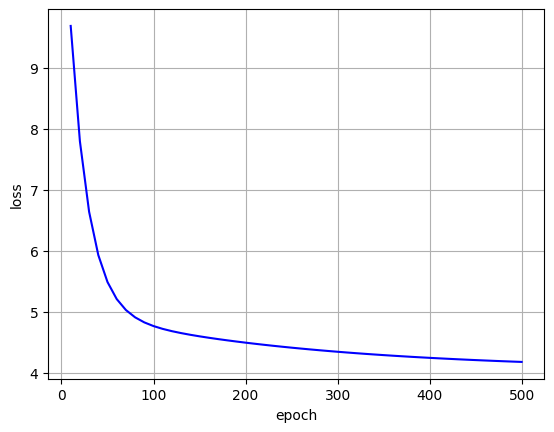

In [ ]:
#학습 곡선 출력 (손실)

plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
# def linear_model(X):
#     # 여기가 WX + b 입니다.
#     return W * X + b

# # 예측값 계산 예시:
# X_range = linear_model(X)

# print(X_range)

In [ ]:
# #산포도와 상관 직선 동시 출력 (그래프)

# plt.scatter(X,Y,c='k',s=50)
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.grid()
# plt.plot(X_range.data,X_range.data,lw=2,c='b')
# plt.show()


#1-6 최적화 함수 사용

In [ ]:
#초기화

#W와 b를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
b = torch.tensor(1.0, requires_grad=True).float()

#반복횟수
epochs = 500

#학습률
lr = 0.01

#potimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim

optimizer = optim.SGD([W,b], lr=lr)


#history 기록을 위한 배열 초기화
history = np.zeros((0,2))

#루프처리
for epoch in range(1,epochs+1):

    #예측 계산
    Yp = pred(X)

    #손실 계산
    loss = mse(Yp,Y)

    #경사 계산
    loss.backward()

    #파라미터 수정
    optimizer.step()

    #경사값  초기화
    optimizer.zero_grad()

    #손실기록
    if (epoch%10 == 0):
        item = np.array([epoch,loss.item()])
        history = np.vstack((history,item))
        print(f'epoch = {epoch} loss = {loss:.4f}')








epoch = 10 loss = 4.7822
epoch = 20 loss = 4.5087
epoch = 30 loss = 4.3544
epoch = 40 loss = 4.2514
epoch = 50 loss = 4.1826
epoch = 60 loss = 4.1367
epoch = 70 loss = 4.1061
epoch = 80 loss = 4.0856
epoch = 90 loss = 4.0720
epoch = 100 loss = 4.0628
epoch = 110 loss = 4.0568
epoch = 120 loss = 4.0527
epoch = 130 loss = 4.0500
epoch = 140 loss = 4.0482
epoch = 150 loss = 4.0470
epoch = 160 loss = 4.0462
epoch = 170 loss = 4.0456
epoch = 180 loss = 4.0453
epoch = 190 loss = 4.0450
epoch = 200 loss = 4.0449
epoch = 210 loss = 4.0447
epoch = 220 loss = 4.0447
epoch = 230 loss = 4.0446
epoch = 240 loss = 4.0446
epoch = 250 loss = 4.0446
epoch = 260 loss = 4.0446
epoch = 270 loss = 4.0446
epoch = 280 loss = 4.0445
epoch = 290 loss = 4.0445
epoch = 300 loss = 4.0445
epoch = 310 loss = 4.0445
epoch = 320 loss = 4.0445
epoch = 330 loss = 4.0445
epoch = 340 loss = 4.0445
epoch = 350 loss = 4.0445
epoch = 360 loss = 4.0445
epoch = 370 loss = 4.0445
epoch = 380 loss = 4.0445
epoch = 390 loss = 4.

In [ ]:
#최종 결과 파라미터 값
print('W = ',W.data.numpy())
print('b = ',b.data.numpy())

#손실 확인
print(f'초기상태 : 손실 :{history[0,1]:.4f}')
print(f'최종상태 : 손실 :{history[-1,1]:.4f}')

W =  1.7687314
b =  4.0941723e-05
초기상태 : 손실 :4.7822
최종상태 : 손실 :4.0445
